# เลือกตั้งเมกาบางนา2020

DSE2 : Data Science Essential #2
---
Homework week1 (Due 24NOV2020)


## BACKGROUND

เกริ่นว่าทำไมถึงทำเรื่องนี้ ......

หัวข้อที่เราจะมาวิเคราะห์คือข้อมูลปัจจัยต่างๆ refugee, gdp, population by race, poverty ..... โดยดูจาก ....... เทียบกับผลลัพธ์การโหวตปี 2016 กับ 2020

โดยเปรียบเทียบระหว่างช่วงปี 2013-2016 (โอบาม่า) กับปี 2017-2020 (ทรัมป์)

## dataset
- Refugee - Number of annual ceiling and actual admitted of refugees (focus on year 2013-2020)  https://raw.githubusercontent.com/worapong-it/dse2/main/Refugee-Admissions_2020.csv
- GDP - US GDP by states (focus on year 2012-2019)
https://raw.githubusercontent.com/worapong-it/dse2/main/gdp_raw.csv

# IMPORT LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 6)

sns.set_theme(style='whitegrid')

#%config InlineBackend.figure_format = 'retina'

In [ ]:
!ls

sample_data


# US Election Result by states

In [ ]:
issues
- รัฐฐานเสียง โหวตพรรคเดิมตลอด (ดูจากใน wiki)
- swing state เปลี่ยนเพราะอะไร, ไม่เปลี่ยนเพราะอะไร
- ข้อมูลที่ขาดหาย (Nan)

- เนื่องจากรัฐหลายๆรัฐจะเลือกโหวตพรรคเดิมตลอดไม่ว่าจะเกิดอะไรขึ้น เพราะฉะนั้นจะคำนวณใหม่
- ทำการแปลงข้อมูลผลโหวตปี 2016 กับปี 2020 ไปเป็นผลลัพธ์ว่ารัฐไหนคะแนนนิยมพรรค democrat เพิ่มขึ้น (ฟ้า) กับนิยม republican เพิ่มขึ้น (แดง)
- มีประเด็นว่ามีรัฐไหนคะแนนนิยมเพิ่มทั้งสองพรรคมั้ย หรือนิยมลดลงทั้งสองพรรค หรือควรทำเป็นหลายระดับมั้ย


# REFUGEE

## Intro

เนื่องจากนโยบายของฝั่ง Trump (Republican) มีประเด็นเรื่องการให้ความสำคัญกับพลเมืองอเมริกันมาก และมีนโยบายกีดกันชาวต่างชาติ

## Prepare data

In [4]:
url = 'https://raw.githubusercontent.com/worapong-it/dse2/main/Refugee-Admissions_2020.csv'
df = pd.read_csv(url)
df

,Year,Annual Ceiling,Number of Admitted Refugees
0,1980,231700,207116
1,1981,217000,159252
2,1982,140000,98096
...,...,...,...
38,2018,45000,22517
39,2019,30000,30000
40,2020,18000,11841


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Year                         41 non-null     int64
 1   Annual Ceiling               41 non-null     int64
 2   Number of Admitted Refugees  41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


## Chart

นำข้อมูลในตาราง .... ซื่งมีข้อมูลดังนี้
Year - ปี ค.ศ. โดยพรรค Democrat บริหาร
Annual Ceiling -
Number of Admitted Refugees - 

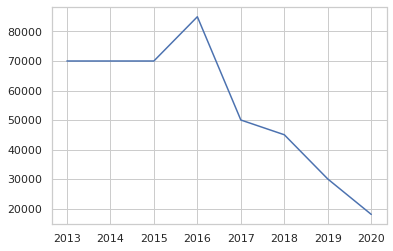

In [6]:
x = df['Year'][33:].astype(int)
y = df['Annual Ceiling'][33:]
plt.plot(x, y);

## Summary

- 

# GDP

## Highlight

prepare data
- เอาตารางไฟล์ gdp มาใช้
- เลือกใช้เฉพาะปี 2012-2019 (ไม่มีปี 2020, ปี 2012 ใช้ดู gdp growth ของปี 2013)
- ตัดแถวที่ไม่ใช่ real gdp ออกไป
- ตัดแถวที่ไม่ใช่รัฐ (เช่น Far west) แต่เอาแถวของ united state (ประเทศ)
- สร้าง data ใหม่ให้เป็น %growth ของ gdp

วิเคราะห์
- ดูว่ารัฐไหน 4 ปี %growth เป็นเท่าไหร่ แล้วเทียบช่วงปีของ obama vs trump
- ดูว่าผลที่ได้กับคะแนนโหวตแต่ละรัฐสอดคล้องกันมั้ย
- แยกเป็นกราฟแนวนอน 50 รัฐ แยกเป็นสีแดงกับฟ้า (โหวต trump, biden 2020) ดูว่าผลโหวตมีแนวโน้มตรงกับค่า %growth ที่เพิ่มขึ้นหรือลดลงอย่างมีนัยสำคัญหรือไม่?

## Prepare data

In [7]:
# load data from url & quick view the data
url = 'https://raw.githubusercontent.com/worapong-it/dse2/main/gdp_raw.csv'
df = pd.read_csv(url)
df

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1.152194e+07,1.203828e+07,1.261049e+07,13130987.00,13262079.00,1.349306e+07,1.387913e+07,1.440638e+07,14912509.00,1.533826e+07,1.562603e+07,1.560469e+07,1.520883e+07,1.559875e+07,15840664.0,16197007.0,1.649537e+07,1.691204e+07,1.743217e+07,1.773051e+07,1.814410e+07,1.868779e+07,1.909166e+07
1,"""00000""",United States,,SAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,7.113600e+01,7.432400e+01,7.785700e+01,81.07,81.88,8.330600e+01,8.568900e+01,8.894500e+01,92.07,9.469800e+01,9.647500e+01,9.634300e+01,9.389900e+01,9.630600e+01,97.8,100.0,1.018420e+02,1.044150e+02,1.076260e+02,1.094680e+02,1.120210e+02,1.153780e+02,1.178720e+02
2,"""00000""",United States,,SAGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,8.577552e+06,9.062817e+06,9.630663e+06,10252347.00,10581822.00,1.093642e+07,1.145825e+07,1.221373e+07,13036637.00,1.381461e+07,1.445186e+07,1.471284e+07,1.444893e+07,1.499205e+07,15542582.0,16197007.0,1.678485e+07,1.752726e+07,1.823830e+07,1.874508e+07,1.954298e+07,2.061186e+07,2.143323e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,"SAGDP1: Gross Domestic Product (GDP) summary, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,"Last updated: October 2, 2020-- revised statis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,Source: U.S. Department of Commerce / Bureau o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# select only columns that matter
col = ['GeoName', 'LineCode']
col2 = list(range(2012, 2020))
col2 = [str(year) for year in col2]
col.extend(col2)
df = df[col]
df

,GeoName,LineCode,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,1.0,16197007.0,1.649537e+07,1.691204e+07,1.743217e+07,1.773051e+07,1.814410e+07,1.868779e+07,1.909166e+07
1,United States,2.0,100.0,1.018420e+02,1.044150e+02,1.076260e+02,1.094680e+02,1.120210e+02,1.153780e+02,1.178720e+02
2,United States,3.0,16197007.0,1.678485e+07,1.752726e+07,1.823830e+07,1.874508e+07,1.954298e+07,2.061186e+07,2.143323e+07
...,...,...,...,...,...,...,...,...,...,...
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# clear NaN, clear rows (& column) that not used
df = df.dropna(axis=0)
df = df[df['LineCode']==1.0]
df = df.drop(columns='LineCode')
df.reset_index()

,index,GeoName,2012,2013,2014,2015,2016,2017,2018,2019
0,0,United States,16197007.0,16495369.0,16912038.0,17432170.0,17730509.0,18144105.0,18687786.0,19091662.0
1,8,Alabama,186553.9,188814.2,187568.0,189428.8,191523.4,193693.0,198053.7,200829.4
2,16,Alaska,57717.5,54748.1,53480.6,54015.3,53289.0,52825.9,52928.7,53255.2
...,...,...,...,...,...,...,...,...,...,...
57,456,Southwest,1939399.5,2003922.4,2068424.7,2162768.2,2178408.5,2234576.5,2317630.1,2386060.9
58,464,Rocky Mountain,540617.5,555700.5,574822.4,598732.2,612042.5,634833.8,663932.3,687941.6
59,472,Far West,2978323.8,3064232.5,3181845.2,3341931.9,3455461.8,3605311.7,3738194.2,3864650.3


In [10]:
# check validity of column 'GeoName' to be used as US 50+1 states & as index
geo_list = df['GeoName'].unique()
print(geo_list, '\n')
print('geo_list size :', geo_list.size)

['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'New England' 'Mideast' 'Great Lakes' 'Plains' 'Southeast' 'Southwest'
 'Rocky Mountain' 'Far West'] 

geo_list size : 60


In [11]:
# set 'GeoName' to be the index
df = df.set_index('GeoName')
df

,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,
United States,16197007.0,16495369.0,16912038.0,17432170.0,17730509.0,18144105.0,18687786.0,19091662.0
Alabama,186553.9,188814.2,187568.0,189428.8,191523.4,193693.0,198053.7,200829.4
Alaska,57717.5,54748.1,53480.6,54015.3,53289.0,52825.9,52928.7,53255.2
...,...,...,...,...,...,...,...,...
Southwest,1939399.5,2003922.4,2068424.7,2162768.2,2178408.5,2234576.5,2317630.1,2386060.9
Rocky Mountain,540617.5,555700.5,574822.4,598732.2,612042.5,634833.8,663932.3,687941.6
Far West,2978323.8,3064232.5,3181845.2,3341931.9,3455461.8,3605311.7,3738194.2,3864650.3


In [12]:
# remove rows that are not the US states
non_states = ['United States', 'New England', 'Mideast', 'Great Lakes', 'Plains', 'Southeast', 'Southwest', 'Rocky Mountain', 'Far West']
df = df.drop(non_states)
df

,2012,2013,2014,2015,2016,2017,2018,2019
GeoName,,,,,,,,
Alabama,186553.9,188814.2,187568.0,189428.8,191523.4,193693.0,198053.7,200829.4
Alaska,57717.5,54748.1,53480.6,54015.3,53289.0,52825.9,52928.7,53255.2
Arizona,268068.2,269967.4,274112.9,281935.6,291259.6,302117.8,314016.1,323597.6
...,...,...,...,...,...,...,...,...
West Virginia,69335.6,70121.2,69720.7,70332.7,69276.4,69743.2,71858.7,72340.4
Wisconsin,274540.5,275648.7,282031.2,288260.1,291320.5,294151.7,303767.4,308044.7
Wyoming,38437.7,38523.2,38711.1,39899.0,38079.7,37866.3,38696.3,39214.0


In [13]:
# create columns percent growth of GDP from year 2013-2019

#grow_2013 = (df['2013']-df['2012'])/df['2012']*100

for year in range(2013, 2020):
    now = str(year)
    prev = str(year-1)
    df['grow_'+now] = (df[now]-df[prev])/df[now]*100

df

,2012,2013,2014,2015,2016,2017,2018,2019,grow_2013,grow_2014,grow_2015,grow_2016,grow_2017,grow_2018,grow_2019
GeoName,,,,,,,,,,,,,,,
Alabama,186553.9,188814.2,187568.0,189428.8,191523.4,193693.0,198053.7,200829.4,1.197103,-0.664399,0.982322,1.093652,1.120123,2.201777,1.382118
Alaska,57717.5,54748.1,53480.6,54015.3,53289.0,52825.9,52928.7,53255.2,-5.423750,-2.370018,0.989905,-1.362945,-0.876653,0.194224,0.613086
Arizona,268068.2,269967.4,274112.9,281935.6,291259.6,302117.8,314016.1,323597.6,0.703492,1.512333,2.774641,3.201268,3.594029,3.789073,2.960930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia,69335.6,70121.2,69720.7,70332.7,69276.4,69743.2,71858.7,72340.4,1.120346,-0.574435,0.870150,-1.524762,0.669313,2.943972,0.665880
Wisconsin,274540.5,275648.7,282031.2,288260.1,291320.5,294151.7,303767.4,308044.7,0.402033,2.263047,2.160861,1.050527,0.962497,3.165481,1.388532
Wyoming,38437.7,38523.2,38711.1,39899.0,38079.7,37866.3,38696.3,39214.0,0.221944,0.485390,2.977268,-4.777611,-0.563562,2.144908,1.320192


In [14]:
# use median of percent GDP growth of year 2013-2016 as representative of GDP of Democrat(Obama), and 2017-2019 for Republican(Trump)
df['median_dem'] = df.loc[:,'grow_2013':'grow_2016'].median(axis = 1)
df['median_rep'] = df.loc[:,'grow_2017':'grow_2019'].median(axis = 1)
df['median_diff'] = df.median_rep - df.median_dem
df

,2012,2013,2014,2015,2016,2017,2018,2019,grow_2013,grow_2014,grow_2015,grow_2016,grow_2017,grow_2018,grow_2019,median_dem,median_rep,median_diff
GeoName,,,,,,,,,,,,,,,,,,
Alabama,186553.9,188814.2,187568.0,189428.8,191523.4,193693.0,198053.7,200829.4,1.197103,-0.664399,0.982322,1.093652,1.120123,2.201777,1.382118,1.037987,1.382118,0.344131
Alaska,57717.5,54748.1,53480.6,54015.3,53289.0,52825.9,52928.7,53255.2,-5.423750,-2.370018,0.989905,-1.362945,-0.876653,0.194224,0.613086,-1.866482,0.194224,2.060705
Arizona,268068.2,269967.4,274112.9,281935.6,291259.6,302117.8,314016.1,323597.6,0.703492,1.512333,2.774641,3.201268,3.594029,3.789073,2.960930,2.143487,3.594029,1.450542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Virginia,69335.6,70121.2,69720.7,70332.7,69276.4,69743.2,71858.7,72340.4,1.120346,-0.574435,0.870150,-1.524762,0.669313,2.943972,0.665880,0.147858,0.669313,0.521455
Wisconsin,274540.5,275648.7,282031.2,288260.1,291320.5,294151.7,303767.4,308044.7,0.402033,2.263047,2.160861,1.050527,0.962497,3.165481,1.388532,1.605694,1.388532,-0.217162
Wyoming,38437.7,38523.2,38711.1,39899.0,38079.7,37866.3,38696.3,39214.0,0.221944,0.485390,2.977268,-4.777611,-0.563562,2.144908,1.320192,0.353667,1.320192,0.966524


In [ ]:
# create column showing vote counts difference between 2016 and 2020 in each state

# to be code...

## Visualization

In [15]:
df_vis = df.sort_values('median_diff', ascending=False)

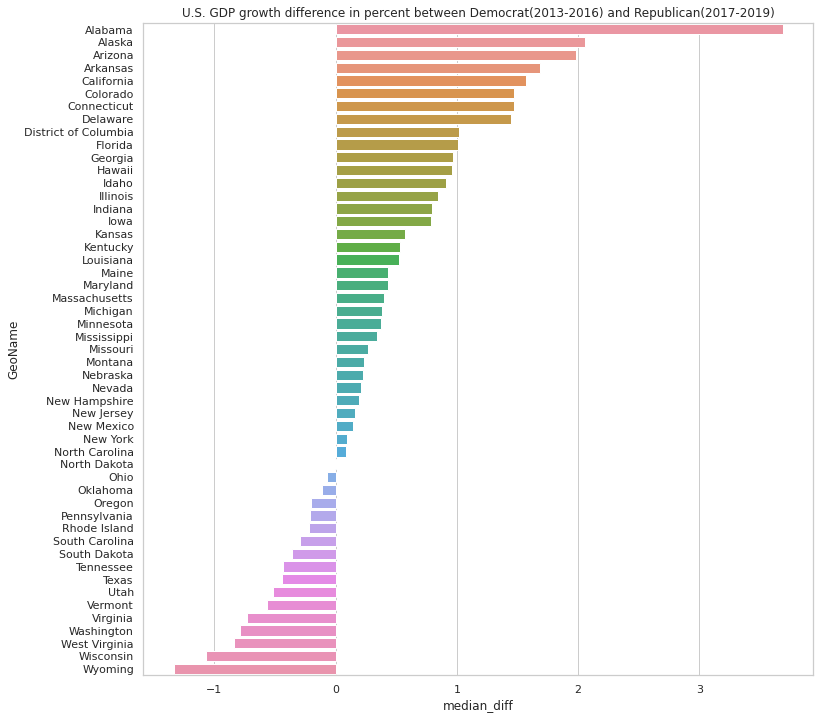

In [16]:
plt.figure(figsize=(12, 12))
title = 'U.S. GDP growth difference in percent between Democrat(2013-2016) and Republican(2017-2019)'
sns.barplot(y = df.index, x='median_diff', data = df_vis).set_title(title);

# Poverty

prepare data
- ตามในโน๊ตพี่ benya


# Master Summary